In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NY-House-Dataset.csv')

In [3]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
df.info() #Checked the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

# Problem Statement

How can stakeholders identify high-potential properties in the **New York housing market** to secure investments through data-driven insights on property value, size, location trends, and bedroom/bathroom configurations to find similar properties at a minimum **5%** price discount within same area by the end of **2024**?

In [5]:
# Data Cleansing.

# Checked for missing values
print(df.isnull().sum())

# Dropped columns that I do not need
df = df.drop(columns=['ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'BROKERTITLE','MAIN_ADDRESS'])

# Removing duplicates
df.drop_duplicates(inplace=True)

df.head()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",New York,New York County,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065",New York,New York County,40.767224,-73.969856


Reading in dataframe

In [6]:
# To understand the data I grouped some columns, to see for each type,sublocality and PROPERTYSQFT for similarity
df_group_sublocality= df.groupby(["SUBLOCALITY",'TYPE',"PROPERTYSQFT"])
df_group_sublocality.head()



,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",New York,New York County,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065",New York,New York County,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...
4790,Condo for sale,789000,3,2.373861,800.0,109 Lafayette St Rm 502,"New York, NY 10013",New York County,New York,40.717926,-74.000594
4792,Multi-family home for sale,1700000,3,7.000000,7854.0,448 40th St,"Brooklyn, NY 11232",New York,Kings County,40.651222,-74.005780
4794,Condo for sale,945000,2,2.000000,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",New York County,New York,40.816711,-73.942050
4795,Multi-family home for sale,2999999,15,9.000000,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224",New York,Kings County,40.578450,-73.982739


In [7]:
# To understand market distribution of properties by sublocality

# Counted the number of occurrences for each sublocality
sublocality_counts = df.groupby('SUBLOCALITY').size().reset_index(name='count')

# Displaying the result
sublocality_counts

,SUBLOCALITY,count
0,Bronx County,291
1,Brooklyn,442
2,Brooklyn Heights,1
3,Coney Island,3
4,Dumbo,1
5,East Bronx,1
6,Flushing,4
7,Fort Hamilton,1
8,Jackson Heights,1
9,Kings County,696


In [8]:
# Interested in sublocality with 100 or more properties

interested_sublocalities = sublocality_counts[sublocality_counts['count'] >= 100]
interested_sublocalities


,SUBLOCALITY,count
0,Bronx County,291
1,Brooklyn,442
9,Kings County,696
11,New York,967
12,New York County,271
13,Queens,534
14,Queens County,655
16,Richmond County,461
20,The Bronx,174


In [9]:
#Extracting only those I am interested in sublocality

Interested_type_by_sublocality=df[df['SUBLOCALITY'].isin(['New York', 'Kings County','Queens County','Queens','Richmond County',
                                                          'Brooklyn','Bronx County','New York County','The Bronx'])]


In [10]:
Interested_type_by_sublocality

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
1,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",New York,New York County,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065",New York,New York County,40.767224,-73.969856
5,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
...,...,...,...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York County,New York,40.774350,-73.955879
4797,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",New York,Queens County,40.732538,-73.860152
4798,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York,New York County,40.745882,-74.003398
4799,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373",Queens County,Queens,40.742770,-73.872752


In [11]:
#Extracting same sublocality to compare the quality which includes PRICE and PROPERTYSQFT

Interested_type_by_sublocality[['TYPE','PRICE','BEDS','BATH', 'PROPERTYSQFT','SUBLOCALITY']]
filtered_quality_prop=Interested_type_by_sublocality[['TYPE','PRICE','BEDS','BATH', 'PROPERTYSQFT','SUBLOCALITY']]
filtered_quality_prop

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
1,Condo for sale,195000000,7,10.000000,17545.000000,New York County
2,House for sale,260000,4,2.000000,2015.000000,Richmond County
3,Condo for sale,69000,3,1.000000,445.000000,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.000000,New York County
5,House for sale,690000,5,2.000000,4004.000000,Kings County
...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862,New York
4797,Co-op for sale,245000,1,1.000000,2184.207862,Queens County
4798,Co-op for sale,1275000,1,1.000000,2184.207862,New York County
4799,Condo for sale,598125,2,1.000000,655.000000,Queens


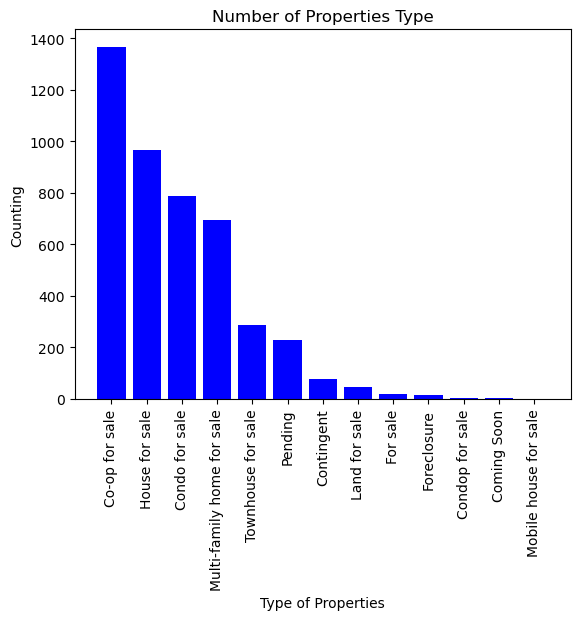

In [12]:
#Plotting the bar plot for the TYPE column to show the categorical values and show the distribution for
# each filtered category: 

type_filtered_graph=filtered_quality_prop['TYPE'].value_counts()
plt.bar(type_filtered_graph.index,type_filtered_graph,color="Blue")
plt.xticks(rotation=90)
plt.xlabel("Type of Properties")
plt.ylabel("Counting")
plt.title("Number of Properties Type")
plt.show()

In [13]:
#Interested specific type which is House, Condo, Multi-Family and Townhouse.

Interested_typeof_properties=df[df['TYPE'].isin(['House for sale', 'Condo for sale','Multi-family home for sale','Townhouse for sale'])]
Interested_typeof_properties

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",New York,New York County,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065",New York,New York County,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...
4790,Condo for sale,789000,3,2.373861,800.0,109 Lafayette St Rm 502,"New York, NY 10013",New York County,New York,40.717926,-74.000594
4792,Multi-family home for sale,1700000,3,7.000000,7854.0,448 40th St,"Brooklyn, NY 11232",New York,Kings County,40.651222,-74.005780
4794,Condo for sale,945000,2,2.000000,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",New York County,New York,40.816711,-73.942050
4795,Multi-family home for sale,2999999,15,9.000000,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224",New York,Kings County,40.578450,-73.982739


In [14]:
# Created function to histplot by property type

def histplot_by_type(type_name):
  sns.histplot(Interested_typeof_properties[Interested_typeof_properties["TYPE"] == type_name]['PRICE'], kde=True,
  label=type_name)
  plt.title(f'Histogram of {type_name}')
  plt.xlabel("PRICE")
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.legend()
  plt.show()

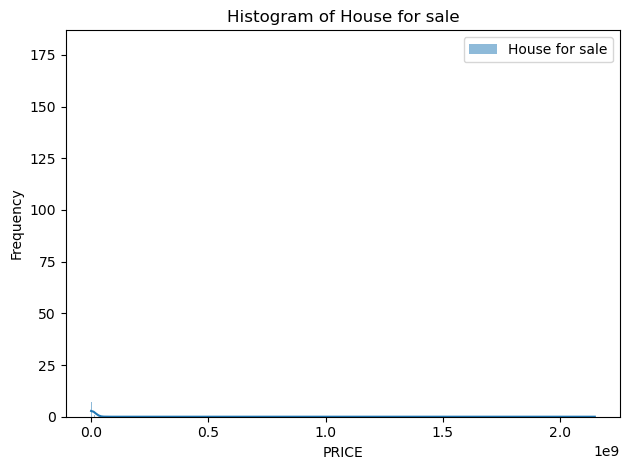

In [15]:
# Made histpot for House for sale, but it is not a clear graph

histplot_by_type('House for sale')

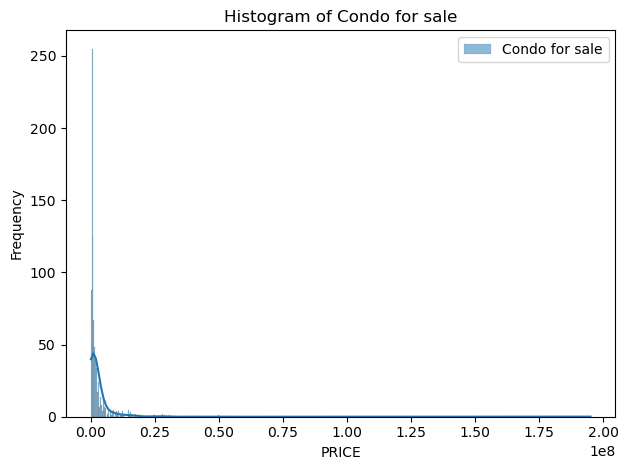

In [16]:
#Repeated the graph for each type

histplot_by_type('Condo for sale') 

   # “Insights”
      **Insight section**

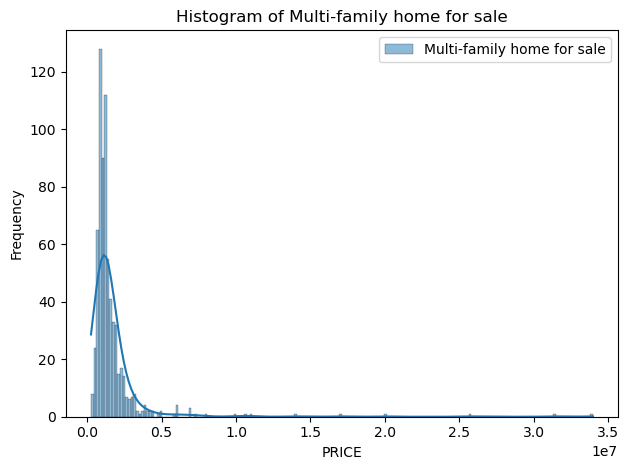

In [17]:
#Repeated the graph for each type

histplot_by_type('Multi-family home for sale')

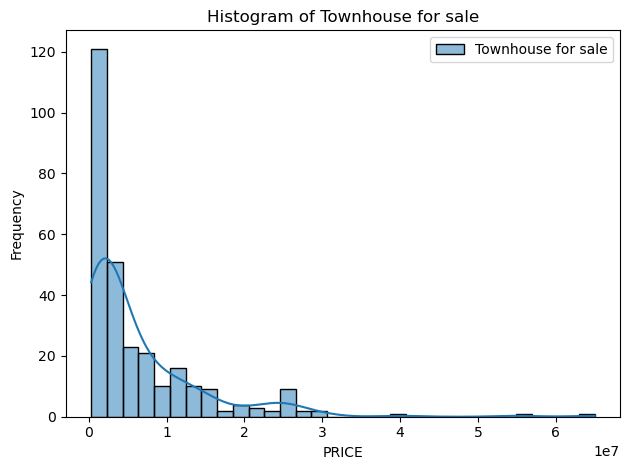

In [18]:
#Repeated the graph for each type

histplot_by_type('Townhouse for sale')

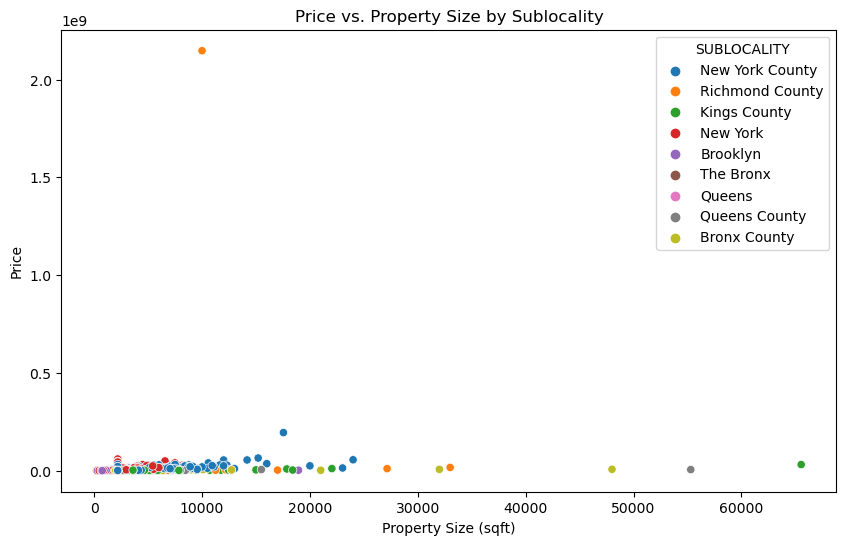

In [19]:
# Scatter plot of Price vs. Property Size, colored by Sublocality

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_quality_prop, x='PROPERTYSQFT', y='PRICE', hue='SUBLOCALITY')
plt.title('Price vs. Property Size by Sublocality')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price')
plt.show()

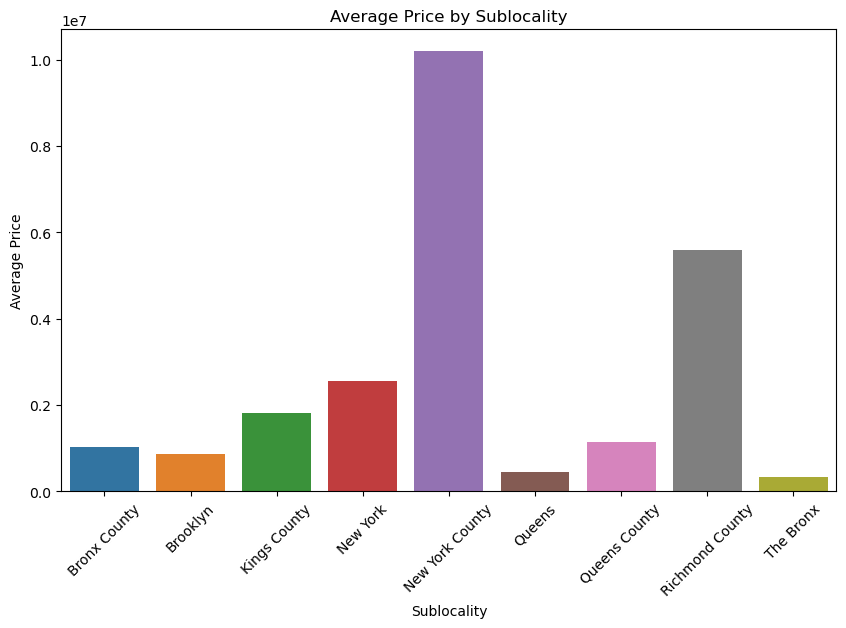

In [20]:
# Bar plot of Average Price by Sublocality

average_price_by_sublocality = filtered_quality_prop.groupby('SUBLOCALITY')['PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_sublocality, x='SUBLOCALITY', y='PRICE')
plt.title('Average Price by Sublocality')
plt.xlabel('Sublocality')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

## Results of histogram

The histograms show that property prices have a high concentration of oultiers, making it challenging to observe the distribution and identify cost-saving opportunities between different property types. This creates difficulties in visualizing price patterns and comparing values across property types effcetively.It could be better with sublocality.


In [21]:
# function to create histplot based on sublocality

def histplot_by_locality(sublocality):
  sns.histplot(Interested_typeof_properties[Interested_typeof_properties["SUBLOCALITY"] == sublocality]['PRICE'], 
               kde=True, label=sublocality)
  plt.title(f'Histogram of {sublocality}')
  plt.xlabel("PRICE")
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.legend()
  plt.show()

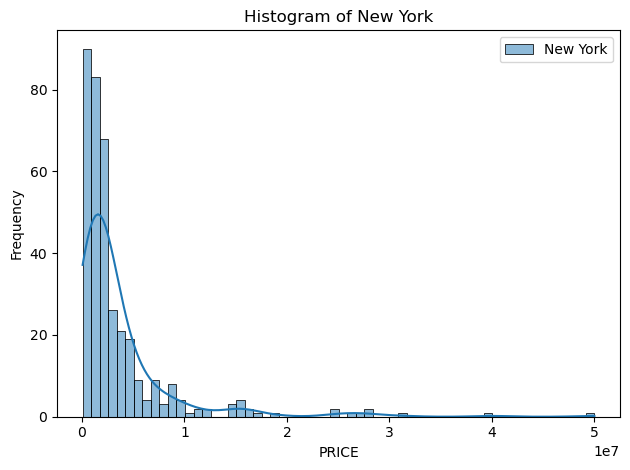

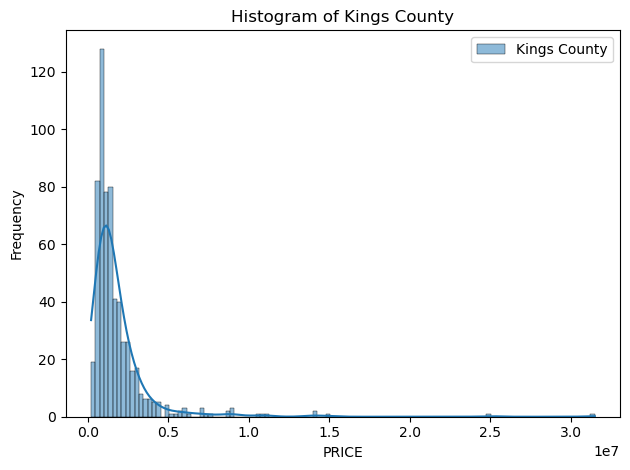

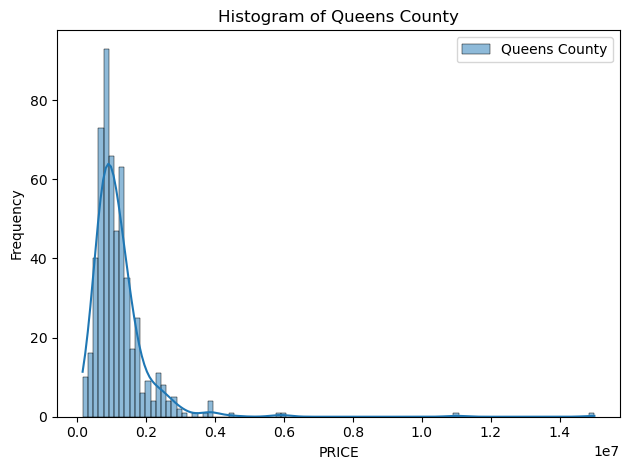

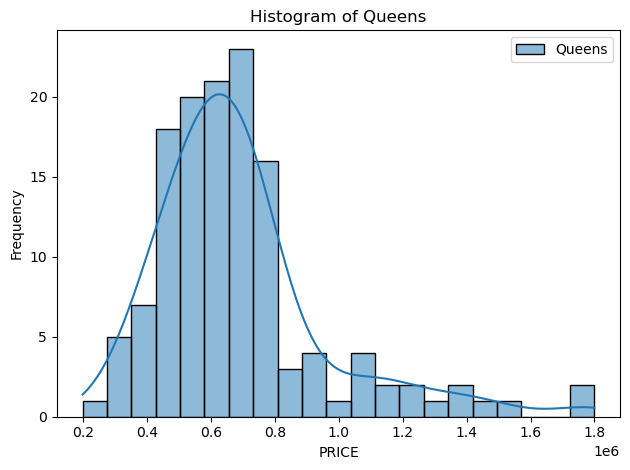

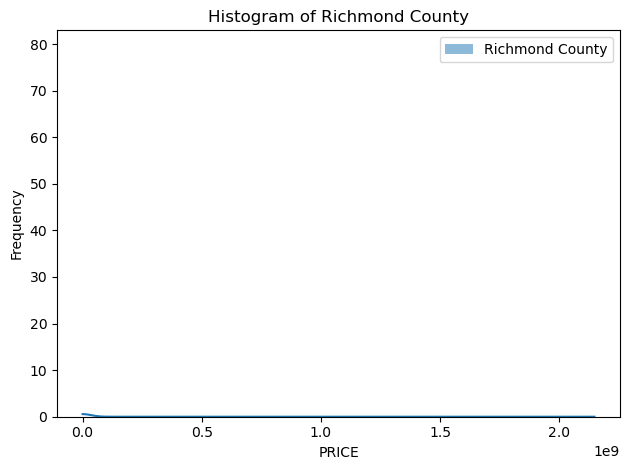

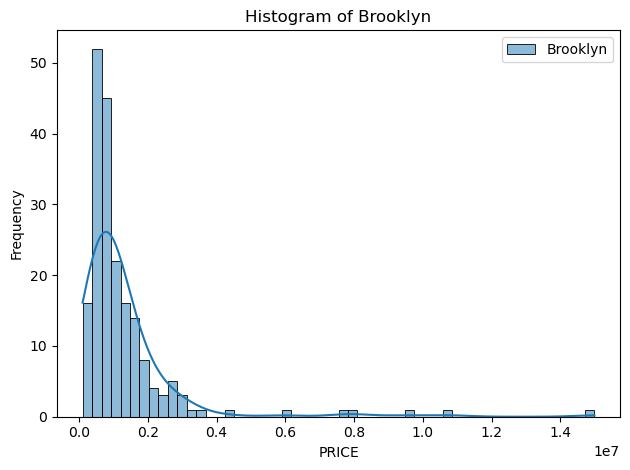

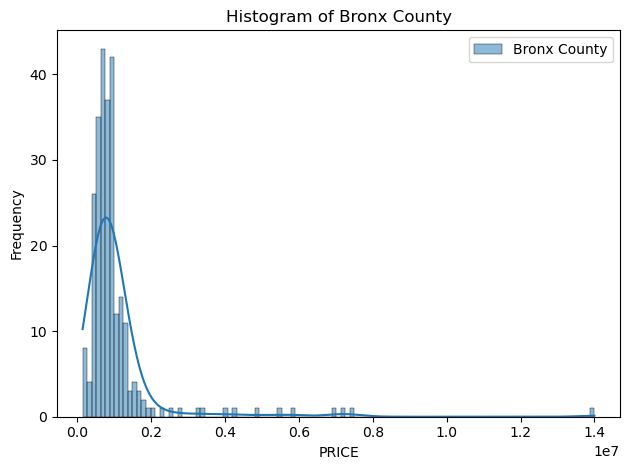

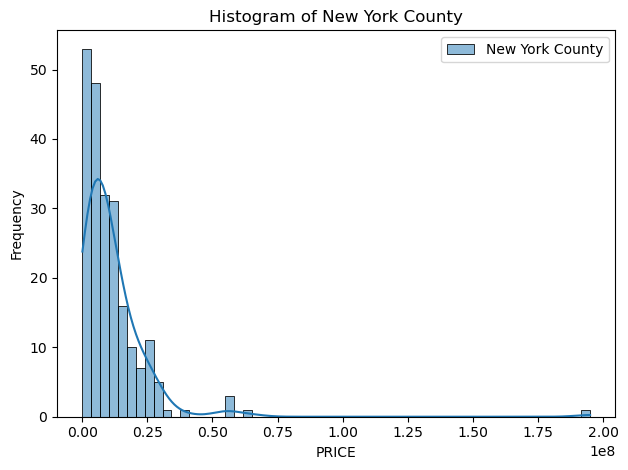

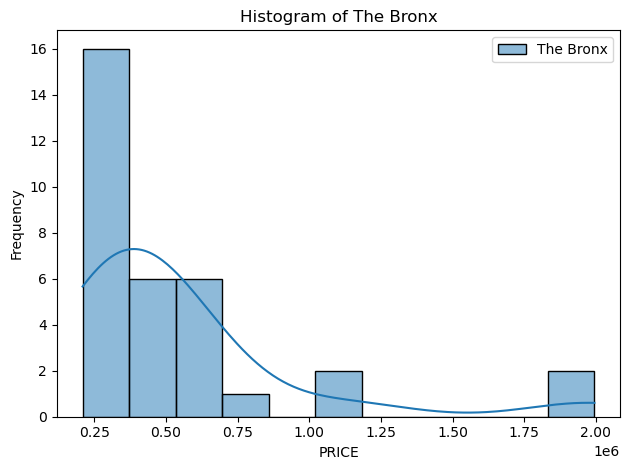

In [22]:
#Used function for loop to make graph for each sublocality

localities = ['New York', 'Kings County','Queens County','Queens','Richmond County',
                                                          'Brooklyn','Bronx County','New York County','The Bronx']
for locality in localities:
  histplot_by_locality(locality)

# Results for histogram for sublocality
 The histogram results indicate investment opportunities in Queens, Queens county, Bronx county, Kings county and Brooklyn. The even distribution in the graph suggests that there are properties available on the lower end of the price spectrum within these regions. This left-skewed distribution implies potential opportunities to acquire discounted properties, making these locations attractive for us.



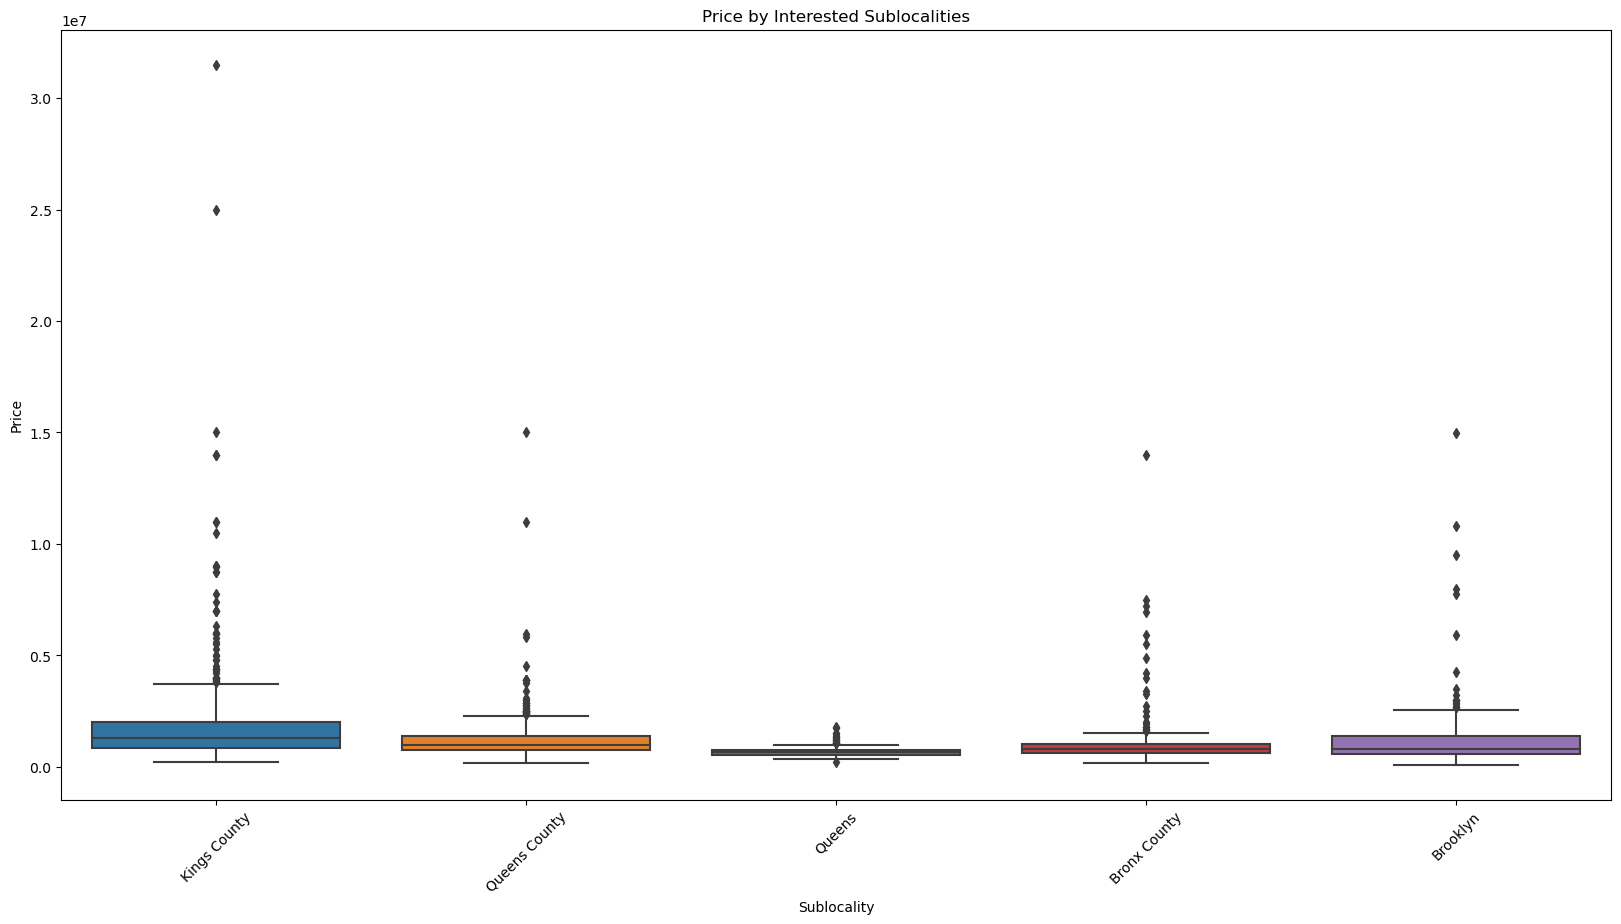

In [23]:
#Wanted to see the interested sublocality's in the boxplot graph to show the outliers visible

interested_sublocalities=['Queens','Queens County','Bronx County', 'Kings County',
                          'Brooklyn']
filtered_df = Interested_typeof_properties[Interested_typeof_properties['SUBLOCALITY']
                                           .isin(interested_sublocalities)]
plt.figure(figsize=(20,10))
sns.boxplot(x='SUBLOCALITY', y='PRICE',data=filtered_df)
plt.xticks(rotation=45)
plt.title("Price by Interested Sublocalities")
plt.xlabel("Sublocality")
plt.ylabel("Price")
plt.show()


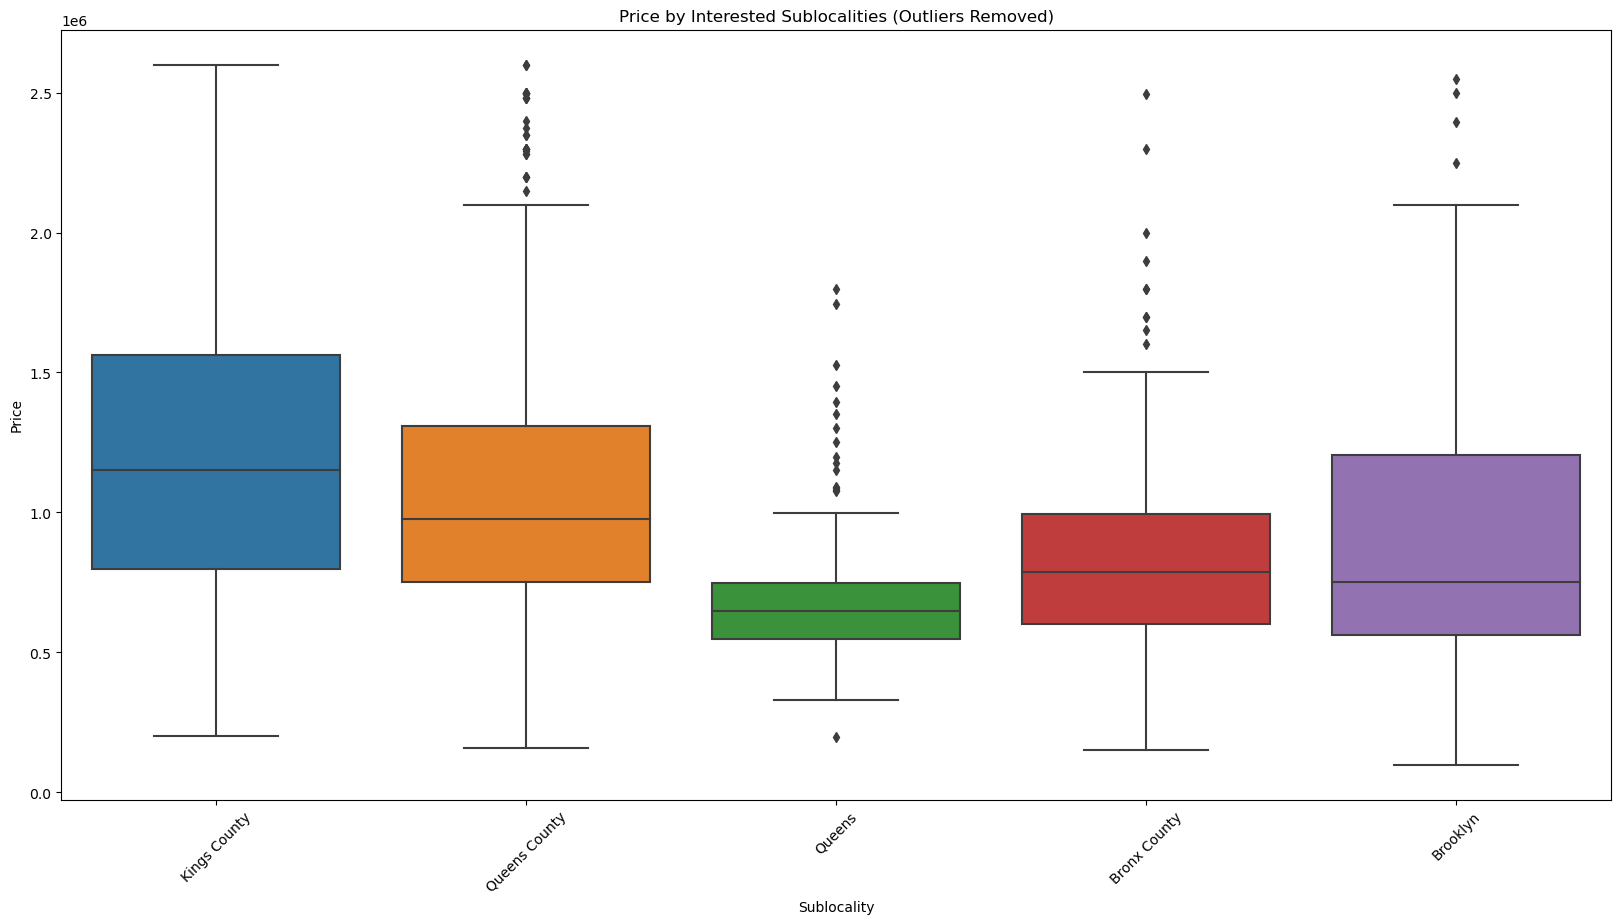

In [24]:
#Since we targeted only cheaper properties, we do not need outliers on the top. I removed upper outliers. And to see 
# outliers clearer used standard deviation.  

interested_sublocalities=['Queens','Queens County','Bronx County', 'Kings County', 'Brooklyn']
filtered_df = Interested_typeof_properties[Interested_typeof_properties['SUBLOCALITY'].isin(interested_sublocalities)]

factor = 0.75
data_mean, data_std = filtered_df["PRICE"].mean(), filtered_df["PRICE"].std()
cut_off = data_std * factor
upper = data_mean + cut_off

# used for loop for outliers
outliers = []
for x in filtered_df["PRICE"]:
  if x > upper:
    outliers.append(x)

# Removed outliers
filtered_df_no_outliers = filtered_df[~filtered_df["PRICE"].isin(outliers)]

# I used filtered_df_no_outliers for graph
plt.figure(figsize=(20,10))
sns.boxplot(x='SUBLOCALITY', y='PRICE',data=filtered_df_no_outliers)
plt.xticks(rotation=45)
plt.title("Price by Interested Sublocalities (Outliers Removed)")
plt.xlabel("Sublocality")
plt.ylabel("Price")
plt.show()

In [25]:
filtered_df_no_outliers

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
5,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
16,Townhouse for sale,975000,3,2.000000,1734.000000,28-31 Hobart St,"Woodside, NY 11377",New York,Queens County,40.760768,-73.905667
19,Condo for sale,599000,2,2.000000,974.000000,92-29 Queens Blvd Unit 3H,"Rego Park, NY 11374",Queens County,Queens,40.732471,-73.867080
21,Condo for sale,1300000,2,2.000000,1244.000000,10724 71st Rd Apt 9F,"Forest Hills, NY 11375",Queens County,Queens,40.720243,-73.843051
22,Multi-family home for sale,1100000,6,3.000000,2837.000000,1038 Throggs Neck Expy Unit Sr,"Bronx, NY 10465",New York,Bronx County,40.834394,-73.822110
...,...,...,...,...,...,...,...,...,...,...,...
4783,Multi-family home for sale,799000,6,2.373861,2000.000000,4568 Carpenter Ave,"Bronx, NY 10470",New York,Bronx County,40.902780,-73.854059
4784,Condo for sale,349000,2,1.000000,2184.207862,97-52 75th St Unit B42,"Ozone Park, NY 11416",New York,Queens County,40.679752,-73.862498
4786,Multi-family home for sale,1380000,12,3.000000,2681.000000,164-08 85th Ave,"Jamaica, NY 11432",New York,Queens County,40.712448,-73.800851
4792,Multi-family home for sale,1700000,3,7.000000,7854.000000,448 40th St,"Brooklyn, NY 11232",New York,Kings County,40.651222,-74.005780


In [26]:

filtered_df_no_outliers.sort_values(by="PRICE", ascending=False)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
702,Townhouse for sale,2600000,5,5.000000,4057.000000,65 Gates Ave,"Brooklyn, NY 11238",New York,Kings County,40.684633,-73.966003
164,House for sale,2600000,5,4.000000,3024.000000,214-42 27th Ave,"Bayside, NY 11360",New York,Queens County,40.778042,-73.773963
282,Multi-family home for sale,2600000,3,3.000000,3978.000000,99 Bay 11th St,"Brooklyn, NY 11228",New York,Kings County,40.608391,-74.010021
4702,Multi-family home for sale,2599000,8,2.373861,3120.000000,158 Bay 29th St,"Brooklyn, NY 11214",New York,Kings County,40.599200,-73.997914
4576,Multi-family home for sale,2599000,3,6.000000,4662.000000,102 Patchen Ave,"Brooklyn, NY 11221",New York,Kings County,40.688393,-73.927324
...,...,...,...,...,...,...,...,...,...,...,...
1797,Condo for sale,199999,1,1.000000,750.000000,10 E 43rd St Apt 3K,"Brooklyn, NY 11203",Kings County,Brooklyn,40.655858,-73.937783
184,Condo for sale,198000,1,1.000000,750.000000,118-18 Union Tpke Unit 7D,"Queens, NY 11415",Queens County,Queens,40.712760,-73.834330
794,House for sale,160000,3,2.373861,1064.000000,114-48 148 St,"Jamaica, NY 11436",New York,Queens County,40.684506,-73.795030
1752,House for sale,150000,3,2.373861,2184.207862,2862 Briggs Ave,"Bronx Ny, NY 10458",New York,Bronx County,40.869354,-73.888318


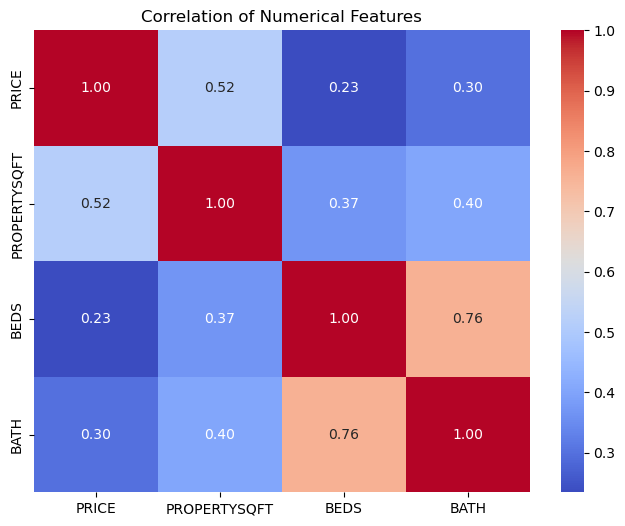

In [27]:
#Wanted to see Heatmap of correlation matrix for numerical features

numerical_cols = ['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']
plt.figure(figsize=(8, 6))
correlation_matrix = filtered_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numerical Features')
plt.show()

In [28]:
# this function is for finding similar properties in the same locality and similar property_sqft
def find_cheaper_properties(df, locality, property_sqft, price_threshold_percentage):
    # Filter properties in the specified locality
    local_properties = df[df['SUBLOCALITY'] == locality]

    # Found the average price of properties with similar sqft
    avg_price_for_size = local_properties[local_properties['PROPERTYSQFT'].between(property_sqft * 0.9, property_sqft * 1.1)]['PRICE'].mean()

    
    # Checked if there are properties with similar sq ft
    if pd.isna(avg_price_for_size):
      return None
    # Calculated the price threshold for cheaper properties
    price_threshold = avg_price_for_size * (1 - price_threshold_percentage)

    # Filtered for properties below the price threshold and similar square footage
    cheaper_properties = local_properties[
        (local_properties['PRICE'] < price_threshold) &
        (local_properties['PROPERTYSQFT'].between(property_sqft * 0.9, property_sqft * 1.1))
    ]

    return cheaper_properties


In [29]:
filtered_df_no_outliers

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
5,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
16,Townhouse for sale,975000,3,2.000000,1734.000000,28-31 Hobart St,"Woodside, NY 11377",New York,Queens County,40.760768,-73.905667
19,Condo for sale,599000,2,2.000000,974.000000,92-29 Queens Blvd Unit 3H,"Rego Park, NY 11374",Queens County,Queens,40.732471,-73.867080
21,Condo for sale,1300000,2,2.000000,1244.000000,10724 71st Rd Apt 9F,"Forest Hills, NY 11375",Queens County,Queens,40.720243,-73.843051
22,Multi-family home for sale,1100000,6,3.000000,2837.000000,1038 Throggs Neck Expy Unit Sr,"Bronx, NY 10465",New York,Bronx County,40.834394,-73.822110
...,...,...,...,...,...,...,...,...,...,...,...
4783,Multi-family home for sale,799000,6,2.373861,2000.000000,4568 Carpenter Ave,"Bronx, NY 10470",New York,Bronx County,40.902780,-73.854059
4784,Condo for sale,349000,2,1.000000,2184.207862,97-52 75th St Unit B42,"Ozone Park, NY 11416",New York,Queens County,40.679752,-73.862498
4786,Multi-family home for sale,1380000,12,3.000000,2681.000000,164-08 85th Ave,"Jamaica, NY 11432",New York,Queens County,40.712448,-73.800851
4792,Multi-family home for sale,1700000,3,7.000000,7854.000000,448 40th St,"Brooklyn, NY 11232",New York,Kings County,40.651222,-74.005780


In [30]:

# Finding in properties that are cheaper in Queens and 1000 sqft

percetile = 0.05
locality = 'Queens'
property_sqft = 1000
cheaper_props = find_cheaper_properties(filtered_df_no_outliers, locality, property_sqft, percetile)

if cheaper_props is not None:
  print(cheaper_props)
else:
  print(f"No cheaper properties found for locality: {locality}, property sqft: {property_sqft}")

                TYPE   PRICE  BEDS  BATH  PROPERTYSQFT  \
19    Condo for sale  599000     2   2.0         974.0   
751   Condo for sale  578000     2   2.0         900.0   
754   Condo for sale  329900     2   2.0         993.0   
1338  Condo for sale  625000     2   2.0         995.0   
1547  Condo for sale  680000     2   2.0        1058.0   
2731  Condo for sale  628000     3   2.0         900.0   
2952  Condo for sale  548000     1   1.0         950.0   
2977  Condo for sale  660000     2   2.0         970.0   
3881  Condo for sale  648888     2   2.0         950.0   
4151  Condo for sale  599000     1   1.0         958.0   
4372  Condo for sale  580000     2   2.0         950.0   

                              ADDRESS                      STATE  \
19          92-29 Queens Blvd Unit 3H        Rego Park, NY 11374   
751              57-15 69th Ln Unit 1          Maspeth, NY 11378   
754              149-30 88 St Unit 4D     Howard Beach, NY 11414   
1338            2 Bay Club Rd U

In [31]:
cheaper_props.to_csv("cheap_queens_1000.csv")

In [32]:
# Finding in properties multiple localities. 

percetile = 0.05

sub_localities = ['Queens','Queens County','Bronx County', 'Kings County', 'Brooklyn']
results = []
for locality in sub_localities:
  for property_sqft in [1000,1500,2000]:
    cheaper_props = find_cheaper_properties(filtered_df_no_outliers, locality, property_sqft, percetile)
    ## save cheap props
    # cheaper_props.to_csv(f"cheap_{locality}_{property_sqft}.csv")
    results.append(cheaper_props)
if results is not None:
  combined_df = pd.concat([df for df in results if df is not None], ignore_index=True)
  print(f"Found {len(combined_df)}")
else:
  print(f"No cheaper properties found for locality: {locality}, property sqft: {property_sqft}")

combined_df.to_csv("cheap_combined.csv")

Found 494


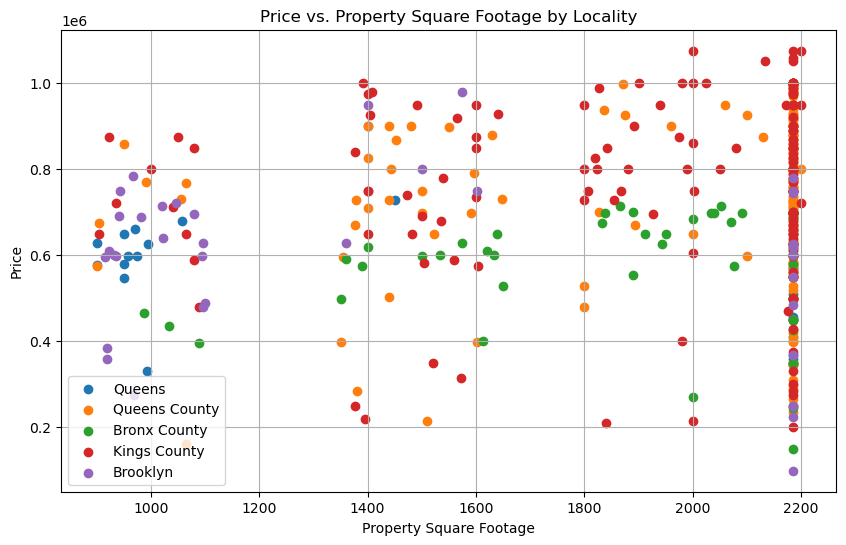

In [33]:
# Created the scatter plot (Scatter plot is the most suitable)

plt.figure(figsize=(10, 6))
for locality in combined_df['SUBLOCALITY'].unique():
    subset = combined_df[combined_df['SUBLOCALITY'] == locality]
    plt.scatter(subset['PROPERTYSQFT'], subset['PRICE'], label=locality)
plt.xlabel('Property Square Footage')
plt.ylabel('Price')
plt.title('Price vs. Property Square Footage by Locality')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
#To show how many cheaper properties that I found in the data, have at least 5% discount price in the same location 
# and with similar quality (Same bedroom/bath, similar PROPERTYSQFT)

property_counts_by_sublocality = combined_df.groupby('SUBLOCALITY')['PROPERTYSQFT'].count()
property_counts_by_sublocality

SUBLOCALITY
Bronx County      49
Brooklyn          38
Kings County     154
Queens            34
Queens County    219
Name: PROPERTYSQFT, dtype: int64

# Problem statement results

How can stakeholders identify high-potential properties in the **New York housing market** to secure investments through data-driven insights on property value, size, location trends, and bedroom/bathroom configurations to find similar properties at a minimum **5%** price discount within same area by the end of **2024**?

I was able to achieve the goal to find with cheaper price for similar quality proporties in: 
Bronx County      49
Brooklyn          38
Kings County     154
Queens            34
Queens County    219 to give to stakeholders to invest it.




Now using Regression To Predict Prices For Negotiation 



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepared the data

X = filtered_df_no_outliers[['PROPERTYSQFT']]  # Features (property size)
y = filtered_df_no_outliers['PRICE']  # Target variable (price)

# Splitted data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Created and train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Made predictions on the test set

y_pred = model.predict(X_test)

# Evaluated the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 229120185695.3064
R-squared: 0.17794290354842934


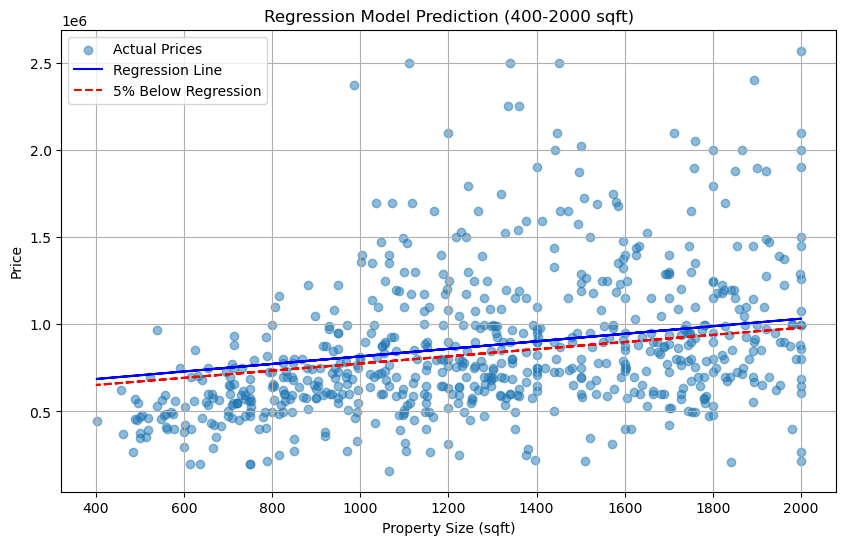

In [36]:
# Filtered data for sqft between 400 and 2000

filtered_data = filtered_df_no_outliers[(filtered_df_no_outliers['PROPERTYSQFT'] >= 400) & (filtered_df_no_outliers['PROPERTYSQFT'] <= 2000)]
X_filtered = filtered_data[['PROPERTYSQFT']]
y_filtered = filtered_data['PRICE']

# Predict prices for the filtered data

y_pred_filtered = model.predict(X_filtered)

# Created the 5% lower line

y_pred_lower = y_pred_filtered * 0.95


# Plotted the regression line and the lower line

plt.figure(figsize=(10, 6))
plt.scatter(X_filtered, y_filtered, label='Actual Prices', alpha=0.5)
plt.plot(X_filtered, y_pred_filtered, color='blue', label='Regression Line')
plt.plot(X_filtered, y_pred_lower, color='red', linestyle='--', label='5% Below Regression')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price')
plt.title('Regression Model Prediction (400-2000 sqft)')
plt.legend()
plt.grid(True)
plt.show()